# By: Basant Ahmed Ragab Mohamed

## Objective

Build a machine learning model to predict future sales using historical Walmart store data.

**Goal**:

Identifying sales patterns and forecast future sales at the store.

## Load and Explore the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
features = pd.read_csv('/content/features.csv')
stores = pd.read_csv('/content/stores.csv')
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [3]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [4]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [7]:
features.shape

(8190, 12)

In [8]:
stores.shape

(45, 3)

In [9]:
train.shape

(421570, 5)

In [10]:
test.shape

(115064, 4)

In [11]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [12]:
train.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0


### Merge train with stores and features

In [13]:
train_merged = train.merge(stores, on='Store').merge(features, on=['Store', 'Date'])

In [14]:
train_merged.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


### Data Preprocessing

In [15]:
train_merged['Date'] = pd.to_datetime(train_merged['Date'])

In [16]:
train_merged = train_merged.sort_values('Date')

In [17]:
train_merged.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday_x,0
Type,0
Size,0
Temperature,0
Fuel_Price,0
MarkDown1,270889


In [18]:
train_merged = train_merged.fillna(0)

In [19]:
train_merged.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
277665,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
277808,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
277951,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
278094,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


In [20]:
train_merged['Month'] = train_merged['Date'].dt.month
train_merged['Year'] = train_merged['Date'].dt.year
train_merged['Week'] = train_merged['Date'].dt.isocalendar().week

In [21]:
train_merged = train_merged.drop(['IsHoliday'], axis=1, errors='ignore')

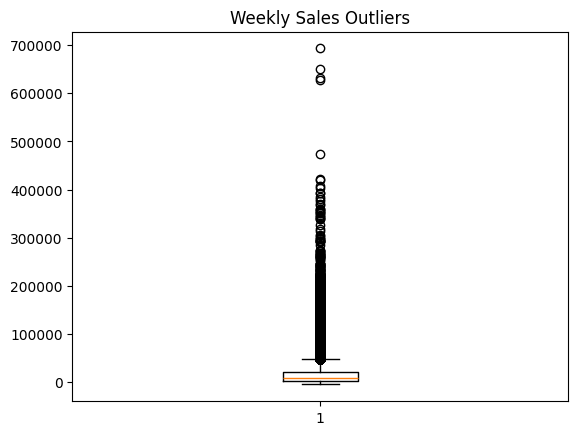

In [22]:
plt.boxplot(train_merged['Weekly_Sales'])
plt.title('Weekly Sales Outliers')
plt.show()

These outliers likely represent holiday weeks, special promotions, or high-performing stores, not errors.

## Exploratory Data Analysis

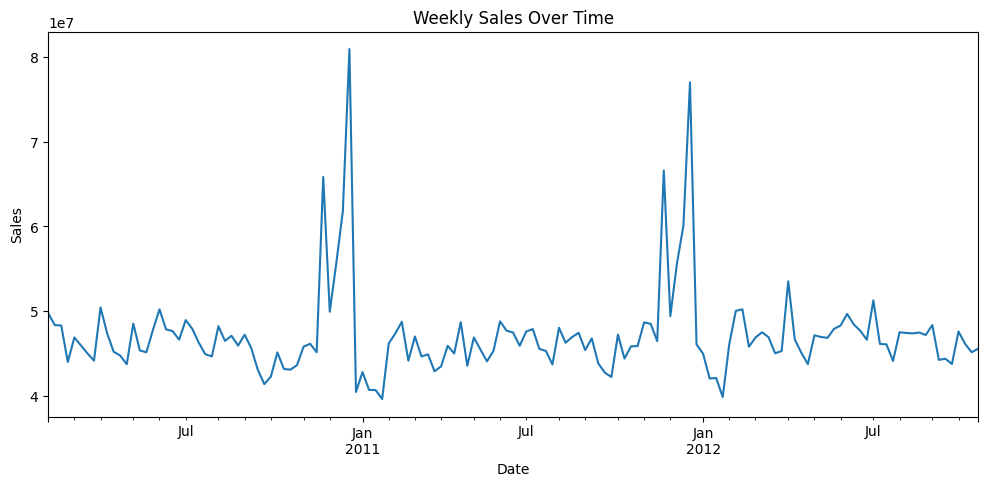

In [23]:
train_merged.groupby('Date')['Weekly_Sales'].sum().plot(figsize=(12,5))
plt.title("Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

**Insights**:

* The dataset shows clear **seasonal patterns** with sharp sales increases during major holiday periods (especially around December).

* Weekly sales remain mostly stable throughout the year, ranging between $40–50 million on average.

* **Noticeable spikes occur during holidays**, suggesting high consumer activity during festive seasons.

* **Post-holiday** declines are evident, **showing reduced spending** after major events.

* The trend is repetitive across years, making it suitable for time series forecasting models.

* Time-related features such as **month, week, and holiday** indicators are expected to play a key role in improving prediction accuracy.

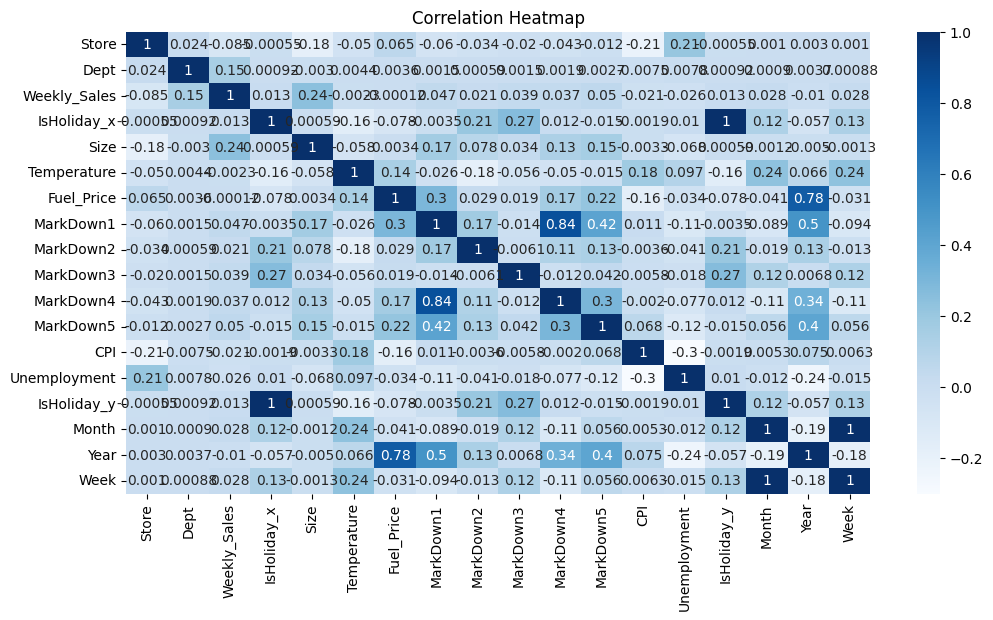

In [24]:
plt.figure(figsize=(12, 6))
sns.heatmap(train_merged.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

**Insights:**

* **Promotional markdowns** are strongly interrelated and positively influence sales.

* **Store size** moderately impacts weekly sales — larger stores generally achieve higher sales.

* **Economic indicators** (Fuel Price and CPI) are closely linked, reflecting market trends.

* **Unemployment and CPI** show a negative relationship, aligning with typical economic behavior.

* **External and temporal factors** (temperature, holidays, month, week) show weak correlations, suggesting limited direct effect on sales.

#### Average Weekly Sales per Store

Text(0.5, 1.0, 'Average Weekly Sales per Store')

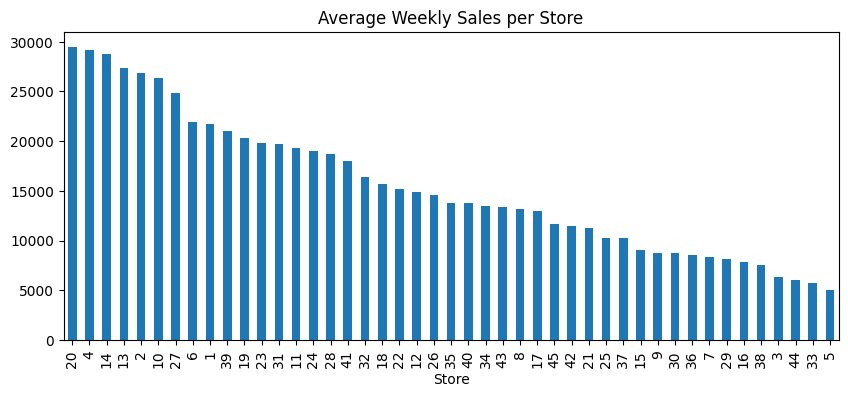

In [25]:
store_sales = train_merged.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
store_sales.plot(kind='bar', figsize=(10,4))
plt.title('Average Weekly Sales per Store')

**Insights:**

* Stores 20, 4, 13, 14, 2, 10, and 27 achieved the highest average weekly sales, ranging roughly between 25,000 and 30,000.

* Among these, Stores 20, 4, and 14 stand out with performance closer to 30,000, marking them as top-performing locations.

* The consistent high performance of these stores may indicate favorable demographics, location advantages, or effective management.

* These insights can guide resource allocation, marketing focus, and store-level strategy optimization.

#### Monthly Sales Distribution

Text(0.5, 1.0, 'Monthly Sales Distribution')

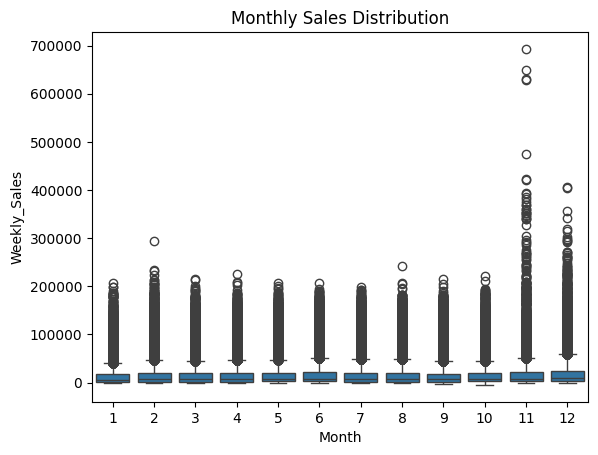

In [26]:
train_merged['Month'] = pd.to_datetime(train_merged['Date']).dt.month
sns.boxplot(x='Month', y='Weekly_Sales', data=train_merged)
plt.title('Monthly Sales Distribution')

**Insights:**

* **Month 11 (November)** shows the **highest weekly sales**, likely due to major holiday shopping events such as Black Friday and Thanksgiving promotions.

* **Month 12 (December)** follows closely as **the second highest**, driven by Christmas and end-of-year sales.

* Sales in **other months** remain **relatively stable**, indicating that seasonal events heavily influence customer purchasing behavior.

* This suggests a **strong seasonal pattern**, highlighting the need for strategic inventory and marketing planning during the holiday season.

### Encode the categorical feature

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_merged['Type'] = le.fit_transform(train_merged['Type'])

### Define features and target

In [28]:
X = train_merged.drop(['Weekly_Sales', 'Date'], axis=1)
y = train_merged['Weekly_Sales']

### Split the data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [30]:
X_train = X_train.drop(['IsHoliday_x', 'IsHoliday_y'], axis=1, errors='ignore')
X_test = X_test.drop(['IsHoliday_x', 'IsHoliday_y'], axis=1, errors='ignore')

### Train a regression model (Random Forest)

In [31]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
y_pred = rf_model.predict(X_test)

#### Model Evaluation

In [33]:
mae = mean_absolute_error(y_test, y_pred)

In [34]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [35]:
r2 = r2_score(y_test, y_pred)

In [36]:
print(f"Random Forest Results:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Random Forest Results:
MAE: 1845.97
RMSE: 3835.32
R² Score: 0.9695


**Insights:**

* **MAE (1845.97)**:
  * On average, your predictions differ from actual weekly sales by about $1.8K, which is quite small considering sales range in tens of thousands.

* **RMSE (3835.32)**:
  * Slightly higher than MAE, meaning there are a few larger errors, but overall the model handles most cases well.

* **R² Score (0.9695)**:
  * Excellent fit — the model explains about 97% of the variance in weekly sales.
  * Indicates that Random Forest successfully captures complex, non-linear relationships between factors like markdowns, store size, and seasonal effects.

#### Actual vs Predicted Weekly Sales

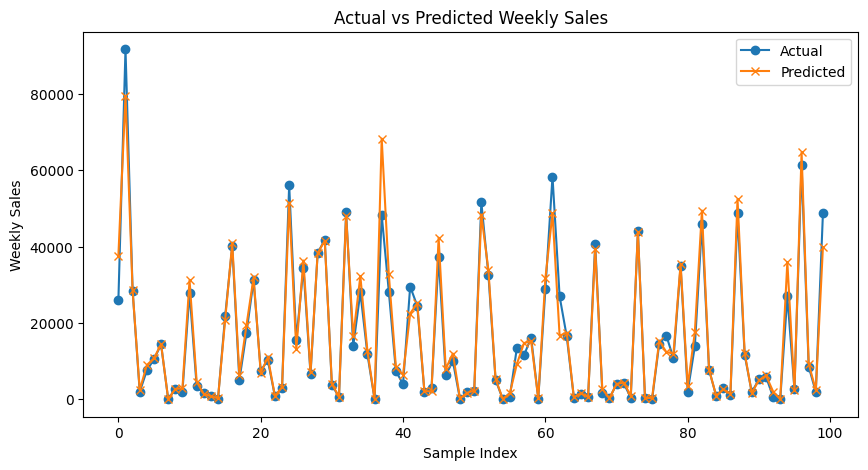

In [37]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('Actual vs Predicted Weekly Sales')
plt.xlabel('Sample Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

*The Random Forest model performs very accurately in forecasting sales — it generalizes well and captures key seasonal and promotional trends.*

### External Test

Prepare Test dataset

In [38]:
test_merged = test.merge(features, on=['Store', 'Date', 'IsHoliday'], how='left')
test_merged = test_merged.merge(stores, on='Store', how='left')

In [39]:
test_merged['Date'] = pd.to_datetime(test_merged['Date'])
test_merged['Month'] = test_merged['Date'].dt.month
test_merged['Year'] = test_merged['Date'].dt.year
test_merged['Week'] = test_merged['Date'].dt.isocalendar().week

In [40]:
test_merged = test_merged.drop(['IsHoliday'], axis=1, errors='ignore')
test_merged = test_merged.fillna(0)

In [41]:
common_cols = [col for col in X_train.columns if col in test_merged.columns]

X_external = test_merged[common_cols]

In [45]:
test_merged.dtypes


,0
Store,int64
Dept,int64
Date,datetime64[ns]
Temperature,float64
Fuel_Price,float64
MarkDown1,float64
MarkDown2,float64
MarkDown3,float64
MarkDown4,float64
MarkDown5,float64


In [46]:
test_ready = test_merged.copy()
test_ready = test_ready.drop(['Date'], axis=1, errors='ignore')

In [47]:
test_ready = pd.get_dummies(test_ready, columns=['Type'], drop_first=True)

test_ready = test_ready.reindex(columns=X_train.columns, fill_value=0)

In [48]:
test_merged = test_merged.drop(['IsHoliday_x', 'IsHoliday_y'], axis=1, errors='ignore')


In [49]:
rf_model.fit(X_train, y_train)
y_external_pred = rf_model.predict(test_ready)

In [50]:
output = pd.DataFrame({
    'Store': test_merged['Store'],
    'Dept': test_merged['Dept'],
    'Date': test_merged['Date'],
    'Predicted_Weekly_Sales': y_external_pred
})

output.to_csv("predicted_sales.csv", index=False)

## Conclusion

* The project aimed to predict weekly sales across various stores and departments using historical Walmart sales data.

* After performing extensive EDA, we identified key trends:

    * Stores 20, 4, 13, 14, 2, 10, and 27 showed the highest performance in weekly sales.

    * Sales peak during November and December, aligning with the holiday season.

* A Random Forest Regressor model was trained using engineered time-based features (Month, Year, Week) and achieved strong results:

    * MAE: 1845.97

    * RMSE: 3835.32

    * R² Score: 0.9695

* These results indicate that the model can explain about 97% of the variance in weekly sales, showing high predictive accuracy.

## Business Recommendations

* **Focus on top-performing stores** (20, 4, and 14) — maintain inventory levels and prioritize marketing support to sustain high sales.

* **Improve performance in lower-performing stores** by replicating strategies from high-performing ones (e.g., layout, promotions, or staffing).

* **Leverage seasonal peaks** — increase stock and promotional activities during November and December to maximize holiday demand.

* **Expand effective discount strategies** — markdowns show a clear positive effect on sales, so optimize promotional timing and product selection.

* **Monitor economic indicators** such as CPI and Fuel Price — adjust pricing and supply chain planning accordingly.

* **Enhance forecasting models** using additional features like regional holidays or online sales data to improve prediction accuracy.

* **Adopt data-driven decision making** — continuously analyze sales data to refine marketing, staffing, and supply strategies.